# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score #MAE - Measures prediction error r2- Measures model quality

# 2. Load the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('house_price.csv')

# Display the first few rows
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

# 3. Data Exploration
Check for missing values:

In [3]:
print(df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


# 4. Data Preprocessing
Handle missing values:

In [4]:
df.fillna(df.median(), inplace=True)

C:\Users\dhili\AppData\Local\Temp\ipykernel_13068\3604797450.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(), inplace=True)


In [6]:
#'''it used to convert categorical variable(non numeric) to numeric values convert'''
df = pd.get_dummies(df, drop_first=True) 

# Model Selection


In [60]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

Linear Regression is a fundamental machine learning algorithm used for predicting continuous values based on an input feature (or multiple features). It assumes a linear relationship between the independent variable(s) (X) and the dependent variable (Y).

In [61]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [62]:
y_pred_linear = linear_model.predict(X_test)
print('Training Score: ', linear_model.score(X_train, y_train))
print('Testing Score: ', linear_model.score(X_test, y_test))

Training Score:  0.9363884521100307
Testing Score:  0.6843518022424846


RandomForestRegressor is an ensemble learning algorithm that uses multiple decision trees to make accurate predictions for regression problems. 

 How Does RandomForestRegressor Work?
 
Creates multiple decision trees (n_estimators) using different random subsets of data.

Each tree makes a prediction independently.

Averaging the predictions of all trees gives the final result.

In [63]:
rf_model = RandomForestRegressor(n_estimators=50,random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [64]:
y_pred_rf = rf_model.predict(X_test)
print('Training Score: ', rf_model.score(X_train, y_train))
print('Testing Score: ', rf_model.score(X_test, y_test))

Training Score:  0.9758131010930544
Testing Score:  0.880139281183791


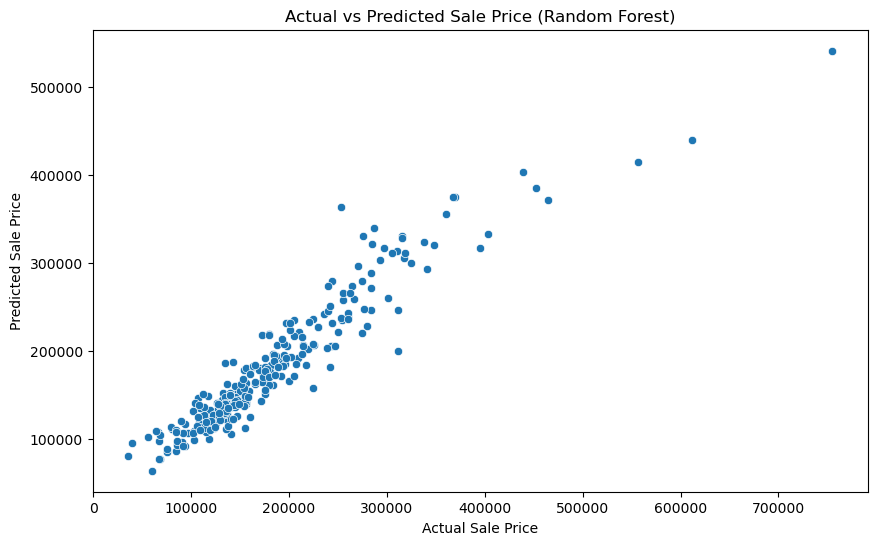

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Price (Random Forest)")
plt.show()